In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df.shape

(15000, 3)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(15000, 3)

there are no duplicates

In [6]:
df['order_id'].unique()
df['order_placed_at'].unique()
df['order_delivered_at'].unique()

array(['2023-03-01 00:18:07.443132', '2023-03-01 00:19:34.925241',
       '2023-03-01 00:22:28.291385', ..., '2023-03-28 00:05:40.676238',
       '2023-03-28 00:08:41.810358', '2023-03-28 00:13:42.499311'],
      dtype=object)

In [7]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 468.8 KB


In [8]:
df['delivery_time']=df['order_delivered_at']-df['order_placed_at']
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056


In [9]:
pct_95 = df['delivery_time'].quantile(0.95)

In [10]:
if pct_95 <= pd.Timedelta(minutes=31):
    print('The store is meeting the performance metric.')
else:
    print('The store needs to improve its performance.')

The store is meeting the performance metric.


In [11]:
df['DayOfTheWeek']=df['order_placed_at'].dt.day_name();
df

,order_id,order_placed_at,order_delivered_at,delivery_time,DayOfTheWeek
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,Wednesday
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,0 days 00:15:32.409378,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,0 days 00:16:44.672912,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,0 days 00:15:24.676238,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,0 days 00:15:57.810358,Monday


In [12]:
mean_time=df['delivery_time'].mean()
median_delivery_time = df['delivery_time'].median()
pct_delivered_within_31_min = (df['delivery_time'] <= pd.Timedelta(minutes=31)).sum() / len(df) * 100
print(pct_delivered_within_31_min)
print(median_delivery_time)
print(mean_time)

96.28666666666666
0 days 00:15:47.879164
0 days 00:20:29.963359588


As we can see that there is high percentage of the delivery within 31 mins . This proves that the Majority of the the delivery  is made within 31 mins 

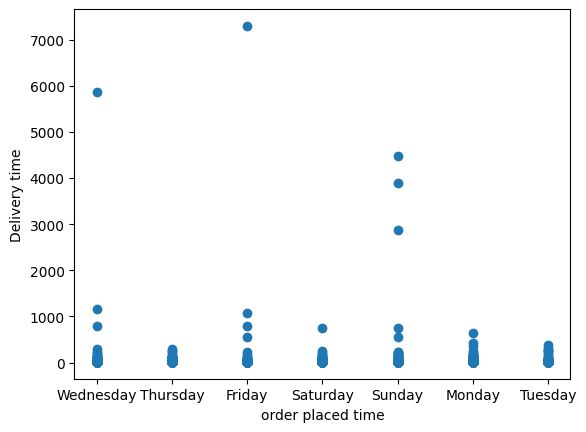

In [13]:
import matplotlib.pyplot as plt
#creating a scatter plot to show delivery time vs order time
plt.scatter(df['order_placed_at'].dt.day_name(),df['delivery_time'].dt.total_seconds()/60)
plt.xlabel('order placed time')
plt.ylabel('Delivery time')
plt.show()

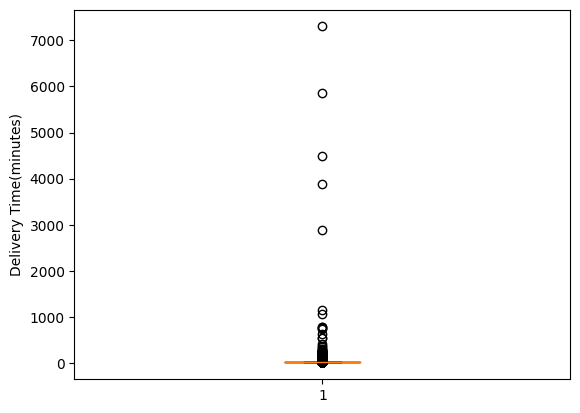

In [14]:
plt.boxplot(df['delivery_time'].dt.total_seconds()/60)
plt.ylabel('Delivery Time(minutes)')
plt.show()

as we can see there exsist outliers 

In [15]:
df['delivery_time'].quantile(0.95)

Timedelta('0 days 00:27:15.662639799')

In [16]:
# calculate the first and third quartiles of the delivery time data
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)

# calculate the interquartile range (IQR)
IQR = Q3 - Q1

# define the threshold for outliers
threshold = 1.5 * IQR

# identify the outliers
outliers = (df['delivery_time'] > Q3 + threshold) | (df['delivery_time'] < Q1 - threshold)

# count the number of outliers
num_outliers = np.sum(outliers)

# print the number of outliers
print("Number of outliers: ", num_outliers)
#taking out percentage of outliers
percent_outliers=num_outliers/len(df) *100
print("Percentage of outliers: {:.2f}%".format(percent_outliers))


Number of outliers:  1734
Percentage of outliers: 11.56%


THE RREASON OF THE HIGH NUMBER OF OUTLIER IS DUE TO THE SPREADNESS AND THE EXTREMES OF THE DATA . WHERE ONE THING WHICH WE CN CONCLUDE THROUGH THIS IS THAT THAT MAJORITY OF THE THE ORDER DELIVERY HAPPENS ON THE SAME DAY 

In [19]:
# create a new column for time of day
df['time_of_day'] = pd.cut(df['order_placed_at'].dt.hour, 
                             bins=[0, 6, 12, 18, 24], 
                             labels=['night', 'morning', 'afternoon', 'evening'], 
                             include_lowest=True)
df.head()


,order_id,order_placed_at,order_delivered_at,delivery_time,DayOfTheWeek,time_of_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,Wednesday,night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,Wednesday,night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,Wednesday,night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,Wednesday,night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,Wednesday,night


In [20]:
df.describe()

,order_id,delivery_time
count,1.500000e+04,15000
mean,1.530610e+06,0 days 00:20:29.963359588
std,4.330271e+03,0 days 01:36:09.621708129
min,1.523111e+06,0 days 00:15:00.000620
25%,1.526861e+06,0 days 00:15:16.489559750
50%,1.530610e+06,0 days 00:15:47.879164
75%,1.534360e+06,0 days 00:17:16.779654250
max,1.538110e+06,5 days 01:39:49.882496


as we can see the max delivery time is about 5 days so we can assume that in this instance there maybe a case of advance order

In [22]:
pivot_table = pd.pivot_table(df, values='delivery_time', index='time_of_day', aggfunc='mean')

print(pivot_table)

                        delivery_time
time_of_day                          
night       0 days 00:19:49.702096880
morning     0 days 00:23:05.165451510
afternoon   0 days 00:20:18.395650371
evening     0 days 00:18:38.795677675


as we can see the average time in the evening is lesser 

In [23]:
delivery_couts=df.groupby('time_of_day').count()['delivery_time']
print(delivery_couts)

time_of_day
night        4402
morning      3703
afternoon    3705
evening      3190
Name: delivery_time, dtype: int64


based on this we can assume that the delivery msotly happens on night 

In [27]:
import statsmodels.api as sm
time_of_day_map={'night':0,'morning':1,'afternoon':2,'evening':3}
features = df[['delivery_time']]
features['day_of_week'] = df['order_placed_at'].dt.dayofweek
features['hour'] = df['order_placed_at'].dt.hour
features['time_of_day'] = df['time_of_day'].map(time_of_day_map)

model = sm.OLS(features['delivery_time'].dt.total_seconds() / 60, sm.add_constant(features[['day_of_week', 'hour', 'time_of_day']]))

print(model.fit().summary())


                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7046
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.549
Time:                        07:22:17   Log-Likelihood:                -89773.
No. Observations:               15000   AIC:                         1.796e+05
Df Residuals:                   14996   BIC:                         1.796e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.4161      2.274      8.540      

<ipython-input-27-bda5486d73d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['day_of_week'] = df['order_placed_at'].dt.dayofweek
<ipython-input-27-bda5486d73d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['hour'] = df['order_placed_at'].dt.hour
<ipython-input-27-bda5486d73d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd